In [105]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.filters as flt
import skimage.morphology as morph
import sys 
sys.path.append('/Users/kaestner/git/scripts/python/')
import amglib.readers as rd
import amglib.bb as bb
import scipy.ndimage as nd
import skimage.measure as measure

In [216]:
data_path = '/Users/kaestner/git/TestData/2D/fits/BB/'

files = ['bb-tomo_00001.fits','bbsample_00001.fits','ob_bb_taper.fits',
         'bb_00001.fits','sample_0001.fits',
         'bbob05s_00001.fits','ob-bb_00001.fits','sample_0002.fits',
         'bbob_00001.fits','ob_00001.fits','water_bb_00001.fits']



In [324]:
img = rd.read_image(data_path+files[-1])
mimg=flt.median(img,footprint=np.ones([5,5]))

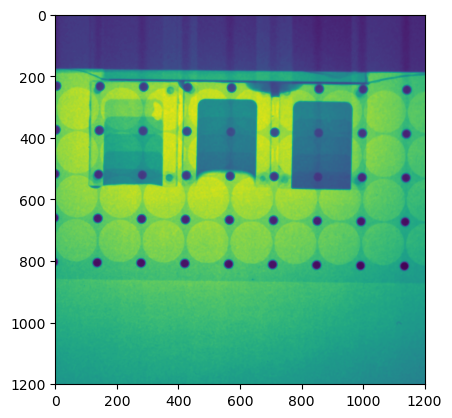

In [325]:
plt.imshow(mimg)

In [326]:
N=105
# m=flt.median(img,footprint=morph.disk(N//2))

m=flt.median(flt.median(mimg,footprint=np.ones([1,N])),footprint=np.ones([N,1]))

In [327]:
dm=m-mimg
dm[dm<0]=0

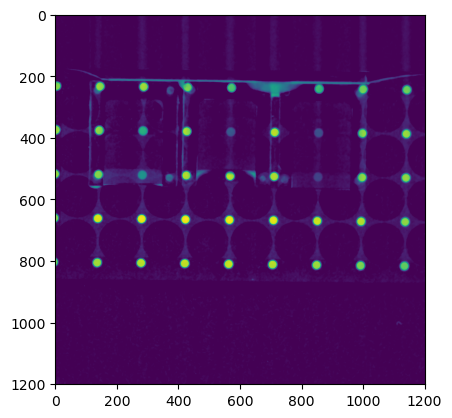

In [328]:
plt.imshow(dm)

In [340]:
def threshold_rosin(data,bins=100) :
    h,a = np.histogram(data.ravel(),bins=bins)
    h=h[1:]
    x=np.arange(0,len(h))
    idxmax = np.argmax(h)
    
    k = (h[-1]-h[idxmax])/(len(h)-1-idxmax)
    m = idxmax*k + h[idxmax]

    d = np.abs(k*x-h+m)/np.sqrt(k**2+1)
    
    idx = np.argmax(d)+1
    print(idx)
    return a[idx] 

th = threshold_rosin(dm[0<dm].ravel(),bins=200)
print(th)  

21
2561.32


21


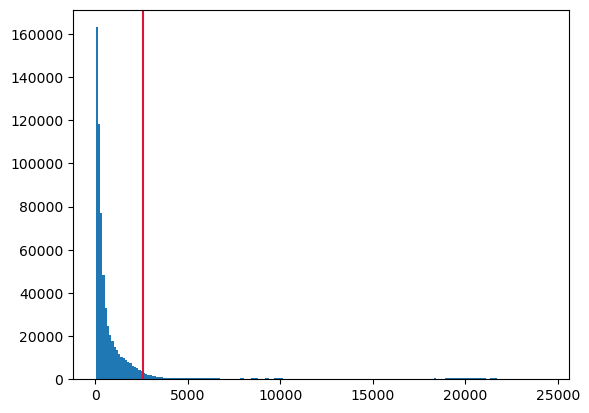

In [341]:

h= plt.hist(dm[0<dm].ravel(),bins=200);

th=threshold_rosin(dm[0<dm].ravel(),bins=200)
plt.axvline(th,color='crimson')
np.savetxt('hist.txt', h[0],fmt='%d',delimiter=',')

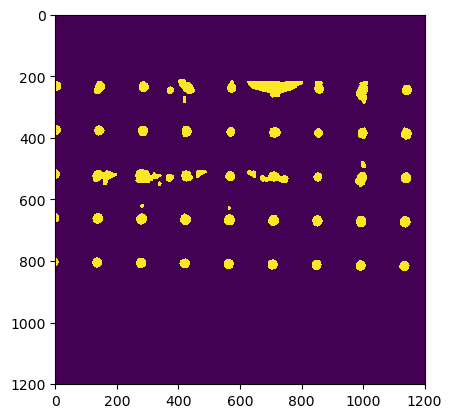

In [342]:

tm=morph.closing(morph.opening(th<dm,footprint=morph.disk(5)),footprint=morph.disk(5))
# tm=th<dm
plt.imshow(tm, interpolation = 'none')

#### 

In [214]:
lbl = morph.label(tm)
props = measure.regionprops_table(lbl,properties=['area','centroid'])

(array([15.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 27.]),
 array([  46.,  291.,  536.,  781., 1026., 1271., 1516., 1761., 2006.,
        2251., 2496.]),
 <BarContainer object of 10 artists>)

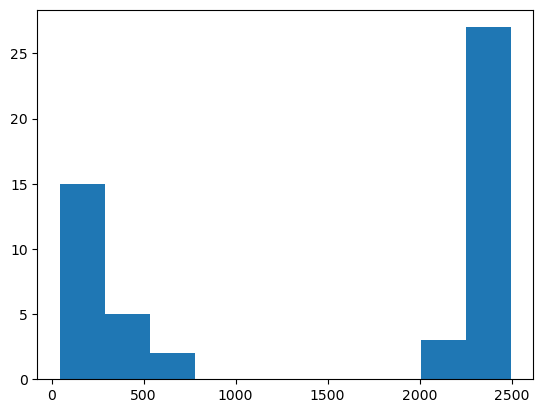

In [215]:
plt.hist(props['area'])

In [291]:
np.argmax(d)

20

In [259]:
N=50
w=flt.median(flt.median(mimg,footprint=np.ones([1,N])),footprint=np.ones([N,1]))

In [158]:
w2=flt.median(mimg,footprint=np.ones([N,N]))

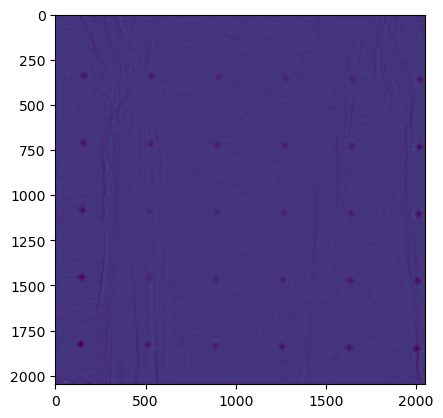

In [160]:
plt.imshow(img-w)

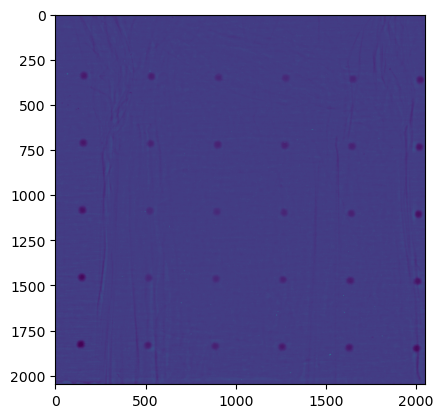

In [161]:
plt.imshow(img-w2)